In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns" , 50)

Matplotlib is building the font cache; this may take a moment.


In [2]:
dataset_url = "https://git.io/nlp-with-transformers"

In [3]:
df = pd.read_json(dataset_url, lines = True)

In [4]:
cols = ["url", "id", "title", "user", "labels", "state", "created_at", "body"]
df.loc[2, cols].to_frame()

,2
url,https://api.github.com/repos/huggingface/trans...
id,849529761
title,[DeepSpeed] ZeRO stage 3 integration: getting ...
user,"{'login': 'stas00', 'id': 10676103, 'node_id':..."
labels,"[{'id': 2659267025, 'node_id': 'MDU6TGFiZWwyNj..."
state,open
created_at,2021-04-02 23:40:42
body,"**[This is not yet alive, preparing for the re..."


In [5]:
df["labels"] = (df["labels"]
                       .apply(lambda x: [meta["name"] for meta in x]))

In [6]:
df.to_csv("github.csv", index = False)

## Find total number of labels per post

In [7]:
df["labels"].apply(lambda x: len(x)).value_counts().to_frame().T

,0,1,2,3,4,5
labels,6440,3057,305,100,25,3


## Find which labels are most common

In [8]:
df_counts = df["labels"].explode().value_counts()

In [9]:
df_counts.to_frame().head(8).T

,wontfix,model card,Core: Tokenization,New model,Core: Modeling,Help wanted,Good First Issue,Usage
labels,2284,649,106,98,64,52,50,46


### get only the top 8 labels we want to use

In [10]:
label_map = {"Core: Tokenization": "tokenization",
             "New model": "new model",
             "Core: Modeling": "model training",
             "Usage": "usage",
             "Core: Pipeline": "pipeline",
             "TensorFlow": "tensorflow or tf",
             "PyTorch": "pytorch",
             "Examples": "examples",
             "Documentation": "documentation"}

def filter_labels(x):
    return [label_map[label] for label in x if label in label_map]

df["labels"] = df["labels"].apply(filter_labels)
all_labels = list(label_map.values())

In [11]:
all_labels

['tokenization',
 'new model',
 'model training',
 'usage',
 'pipeline',
 'tensorflow or tf',
 'pytorch',
 'examples',
 'documentation']

In [12]:
df_counts = df["labels"].explode().value_counts()
df_counts.to_frame().head(8).T

,tokenization,new model,model training,usage,pipeline,tensorflow or tf,pytorch,documentation
labels,106,98,64,46,42,41,37,28


## create an identifier to split if row has label or not

In [13]:
df.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,user,labels,state,locked,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request
0,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849568459,MDU6SXNzdWU4NDk1Njg0NTk=,11046,Potential incorrect application of layer norm ...,"{'login': 'sougata-ub', 'id': 59206549, 'node_...",[],open,False,None,[],NaN,0,2021-04-03 03:37:32,2021-04-03 03:37:32,NaT,NONE,None,"In BlenderbotSmallDecoder, layer norm is appl...",NaN,None
1,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849544374,MDU6SXNzdWU4NDk1NDQzNzQ=,11045,Multi-GPU seq2seq example evaluation significa...,"{'login': 'PeterAJansen', 'id': 3813268, 'node...",[],open,False,None,[],NaN,0,2021-04-03 00:52:24,2021-04-03 00:52:24,NaT,NONE,None,\r\n### Who can help\r\n@patil-suraj @sgugger ...,NaN,None
2,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849529761,MDU6SXNzdWU4NDk1Mjk3NjE=,11044,[DeepSpeed] ZeRO stage 3 integration: getting ...,"{'login': 'stas00', 'id': 10676103, 'node_id':...",[],open,False,"{'login': 'stas00', 'id': 10676103, 'node_id':...","[{'login': 'stas00', 'id': 10676103, 'node_id'...",NaN,0,2021-04-02 23:40:42,2021-04-03 00:00:18,NaT,COLLABORATOR,None,"**[This is not yet alive, preparing for the re...",NaN,None
3,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849499734,MDU6SXNzdWU4NDk0OTk3MzQ=,11043,Can't load model to estimater,"{'login': 'gwc4github', 'id': 3164663, 'node_i...",[],open,False,None,[],NaN,0,2021-04-02 21:51:44,2021-04-02 21:51:44,NaT,NONE,None,I was trying to follow the Sagemaker instructi...,NaN,None
4,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849274362,MDU6SXNzdWU4NDkyNzQzNjI=,11042,[LXMERT] Unclear what img_tensorize does with ...,"{'login': 'hivestrung', 'id': 27841209, 'node_...",[],open,False,None,[],NaN,0,2021-04-02 15:12:57,2021-04-02 15:15:07,NaT,NONE,None,## Environment info\r\n\r\n- `transformers` ve...,NaN,None


In [14]:
df["split"] = "unlabeled"
mask = df["labels"].apply(lambda x: len(x)) > 0
df.loc[mask, "split"] = "labeled"

In [15]:
df["split"].value_counts()

unlabeled    9489
labeled       441
Name: split, dtype: int64

In [16]:
df["text"] = (df.apply(lambda x: x["title"] + "\n\n" + x["body"], axis = 1))

In [17]:
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'body', 'performed_via_github_app',
       'pull_request', 'split', 'text'],
      dtype='object')

### drop duplicates

In [18]:
len_before = len(df)
df = df.drop_duplicates(subset = "text")
print(f"Removed {(len_before - len(df))/len_before:.2%} duplicates.")

Removed 1.88% duplicates.


# Create training sets

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

MultiLabelBinarizer takes a list of label names and creates a vector with zeros for absent labels and ones for present labels. We can test this by fitting MultiLabelBinarizer on all_labels to learn the mapping from label name to ID

In [20]:
all_labels

['tokenization',
 'new model',
 'model training',
 'usage',
 'pipeline',
 'tensorflow or tf',
 'pytorch',
 'examples',
 'documentation']

In [21]:
mlb = MultiLabelBinarizer()
mlb.fit([all_labels])
mlb.transform([["tokenization", "new model"], ["pytorch"]])

array([[0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]])

### Create splits iteratively 

In [22]:
from skmultilearn.model_selection import iterative_train_test_split

def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["labels"])
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels,
                                                           test_size)
    return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:,0]]

In [23]:
from sklearn.model_selection import train_test_split

df_clean = df[["text", "labels", "split"]].reset_index(drop=True).copy()

# unsupervised set
df_unsup = df_clean.loc[df_clean["split"] == "unlabeled", ["text", "labels"]]

# supervised set
df_sup = df_clean.loc[df_clean["split"] == "labeled", ["text", "labels"]]

np.random.seed(0)
df_train, df_tmp = balanced_split(df_sup, test_size=0.5)
df_valid, df_test = balanced_split(df_tmp, test_size=0.5)

In [24]:
df_unsup

,text,labels
0,Potential incorrect application of layer norm ...,[]
1,Multi-GPU seq2seq example evaluation significa...,[]
2,[DeepSpeed] ZeRO stage 3 integration: getting ...,[]
3,Can't load model to estimater\n\nI was trying ...,[]
4,[LXMERT] Unclear what img_tensorize does with ...,[]
...,...,...
9738,DistilBERT\n\nPreparing the release for Distil...,[]
9739,Bert initialization\n\nWhen I train bert model...,[]
9740,UnicodeDecodeError: 'charmap' codec can't deco...,[]
9741,XLNet resize embedding size ERROR\n\n## ❓ Ques...,[]


### Create a dataset so all these splits are in one

In [25]:
from datasets import Dataset, DatasetDict

ds = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True)),
    "valid": Dataset.from_pandas(df_valid.reset_index(drop=True)),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True)),
    "unsup": Dataset.from_pandas(df_unsup.reset_index(drop=True))})


### Create training slides to investigate what's the right balance of supervised to unsupervised data needed

In [26]:
np.random.seed(0)
all_indices = np.expand_dims(list(range(len(ds["train"]))), axis=1)
indices_pool = all_indices
labels = mlb.transform(ds["train"]["labels"])
train_samples = [8, 16, 32, 64, 128]
train_slices, last_k = [], 0

for i, k in enumerate(train_samples):
    # Split off samples necessary to fill the gap to the next split size
    indices_pool, labels, new_slice, _ = iterative_train_test_split(
        indices_pool, labels, (k-last_k)/len(labels))
    last_k = k
    if i==0: train_slices.append(new_slice)
    else: train_slices.append(np.concatenate((train_slices[-1], new_slice)))

# Add full dataset as last slice
train_slices.append(all_indices), train_samples.append(len(ds["train"]))
train_slices = [np.squeeze(train_slice) for train_slice in train_slices]

In [27]:
print("Target split sizes:")
print(train_samples)
print("Actual split sizes:")
print([len(x) for x in train_slices])

Target split sizes:
[8, 16, 32, 64, 128, 223]
Actual split sizes:
[10, 19, 36, 68, 134, 223]


## Create Naive Bayesline

In [30]:
def prepare_labels(batch):
    batch["label_ids"] = mlb.transform(batch["labels"])
    return batch

ds = ds.map(prepare_labels, batched=True)

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

In [47]:
from collections import defaultdict

macro_scores, micro_scores = defaultdict(list), defaultdict(list)


### Train baseline

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.feature_extraction.text import CountVectorizer

for train_slice in train_slices:
    # Get training slice and test data
    ds_train_sample = ds["train"].select(train_slice)
    y_train = np.array(ds_train_sample["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])
    # Use a simple count vectorizer to encode our texts as token counts
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_sample["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])
    # Create and train our model!
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)
    # Generate predictions and evaluate
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0,
        output_dict=True)
    # Store metrics
    macro_scores["Naive Bayes"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes"].append(clf_report["micro avg"]["f1-score"])

In [51]:
import matplotlib.pyplot as plt

def plot_metrics(micro_scores, macro_scores, sample_sizes, current_model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    for run in micro_scores.keys():
        if run == current_model:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linewidth=2)
            ax1.plot(sample_sizes, macro_scores[run], label=run, linewidth=2)
        else:
            ax0.plot(sample_sizes, micro_scores[run], label=run,
                     linestyle="dashed")
            ax1.plot(sample_sizes, macro_scores[run], label=run,
                     linestyle="dashed")

    ax0.set_title("Micro F1 scores")
    ax1.set_title("Macro F1 scores")
    ax0.set_ylabel("Test set F1 score")
    ax0.legend(loc="lower right")
    for ax in [ax0, ax1]:
        ax.set_xlabel("Number of training samples")
        ax.set_xscale("log")
        ax.set_xticks(sample_sizes)
        ax.set_xticklabels(sample_sizes)
        ax.minorticks_off()
    plt.tight_layout()
    plt.show()

## Plot baseline

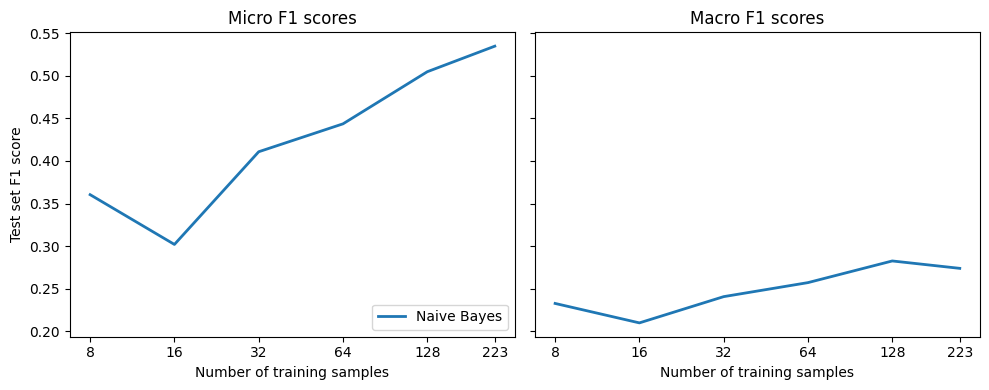

In [38]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes")


Note that we plot the number of samples on a logarithmic scale. From the figure we can see that the micro and macro F1-scores both improve as we increase the number of training samples. With so few samples to train on, the results are also slightly noisy since each slice can have a different class distribution. Nevertheless, what’s important here is the trend, so let’s now see how these results fare against transformer-based approaches!

# Zero Shot Classification

In [ ]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification", device=0)

### Function to predict labels

In [ ]:
def zero_shot_pipeline(example):
    output = pipe(example["text"], all_labels, multi_label=True)
    example["predicted_labels"] = output["labels"]
    example["scores"] = output["scores"]
    return example

ds_zero_shot = ds["valid"].map(zero_shot_pipeline)

### Get predictions

In [43]:
def get_preds(example, threshold=None, topk=None):
    preds = []
    if threshold:
        for label, score in zip(example["predicted_labels"], example["scores"]):
            if score >= threshold:
                preds.append(label)
    elif topk:
        for i in range(topk):
            preds.append(example["predicted_labels"][i])
    else:
        raise ValueError("Set either `threshold` or `topk`.")
    return {"pred_label_ids": list(np.squeeze(mlb.transform([preds])))}

In [44]:
def get_clf_report(ds):
    y_true = np.array(ds["label_ids"])
    y_pred = np.array(ds["pred_label_ids"])
    return classification_report(
        y_true, y_pred, target_names=mlb.classes_, zero_division=0,
        output_dict=True)

In [45]:
macros, micros = [], []
topks = [1, 2, 3, 4]
for topk in topks:
    ds_zero_shot = ds_zero_shot.map(get_preds, batched=False,
                                    fn_kwargs={'topk': topk})
    clf_report = get_clf_report(ds_zero_shot)
    micros.append(clf_report['micro avg']['f1-score'])
    macros.append(clf_report['macro avg']['f1-score'])

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

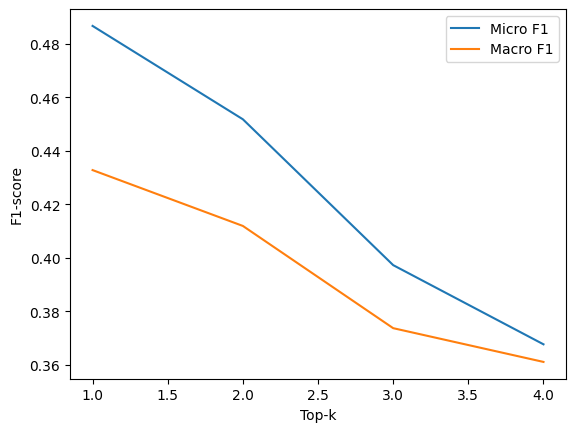

In [46]:
plt.plot(topks, micros, label='Micro F1')
plt.plot(topks, macros, label='Macro F1')
plt.xlabel("Top-k")
plt.ylabel("F1-score")
plt.legend(loc='best')
plt.show()

In [48]:
macros, micros = [], []
thresholds = np.linspace(0.01, 1, 100)
for threshold in thresholds:
    ds_zero_shot = ds_zero_shot.map(get_preds,
                                    fn_kwargs={"threshold": threshold})
    clf_report = get_clf_report(ds_zero_shot)
    micros.append(clf_report["micro avg"]["f1-score"])
    macros.append(clf_report["macro avg"]["f1-score"])

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

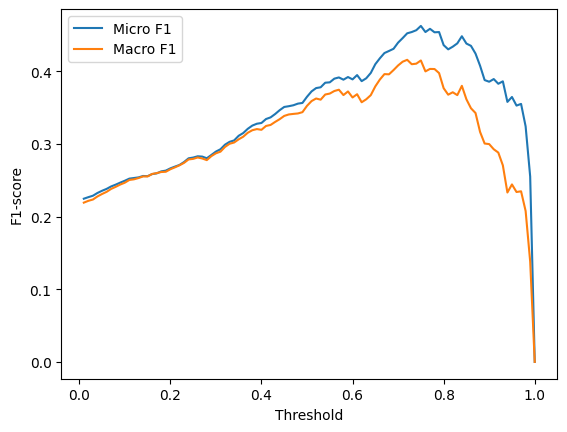

In [49]:
plt.plot(thresholds, micros, label="Micro F1")
plt.plot(thresholds, macros, label="Macro F1")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.legend(loc="best")
plt.show()

In [50]:
best_t, best_micro = thresholds[np.argmax(micros)], np.max(micros)
print(f'Best threshold (micro): {best_t} with F1-score {best_micro:.2f}.')
best_t, best_macro = thresholds[np.argmax(macros)], np.max(macros)
print(f'Best threshold (micro): {best_t} with F1-score {best_macro:.2f}.')

Best threshold (micro): 0.75 with F1-score 0.46.
Best threshold (micro): 0.72 with F1-score 0.42.



This approach fares somewhat worse than the top-1 results, but we can see the precision/recall trade-off clearly in this graph. If we set the threshold too low, then there are too many predictions, which leads to a low precision. If we set the threshold too high, then we will make hardly any predictions, which produces a low recall. From the plot we can see that a threshold value of around 0.8 is the sweet spot between the two.}

### Compare how this performed to NB

In [51]:
ds_zero_shot = ds['test'].map(zero_shot_pipeline)
ds_zero_shot = ds_zero_shot.map(get_preds, fn_kwargs={'topk': 1})
clf_report = get_clf_report(ds_zero_shot)
for train_slice in train_slices:
    macro_scores['Zero Shot'].append(clf_report['macro avg']['f1-score'])
    micro_scores['Zero Shot'].append(clf_report['micro avg']['f1-score'])

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

/opt/conda/lib/python3.8/site-packages/transformers/pipelines/base.py:1012: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Map:   0%|          | 0/111 [00:00<?, ? examples/s]

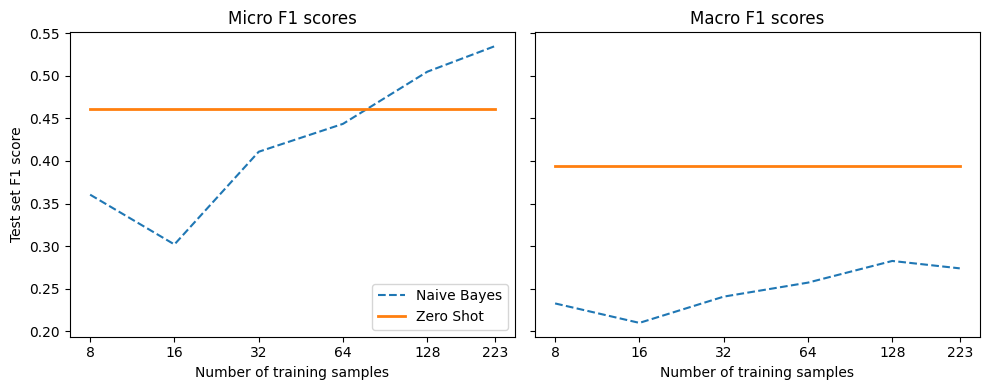

In [52]:
plot_metrics(micro_scores, macro_scores, train_samples, "Zero Shot")


Comparing the zero-shot pipeline to the baseline, we observe two things:

If we have less than 50 labeled samples, the zero-shot pipeline handily outperforms the baseline.

Even above 50 samples, the performance of the zero-shot pipeline is superior when considering both the micro and macro F1-scores. The results for the micro F1-score tell us that the baseline performs well on the frequent classes, while the zero-shot pipeline excels at those since it does not require any examples to learn from

## Data Augmentation

In [53]:
from transformers import set_seed
import nlpaug.augmenter.word as naw

set_seed(3)
aug = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cpu", action="substitute")

text = "Transformers are the most popular toys"
print(f"Original text: {text}")
print(f"Augmented text: {aug.augment(text)}")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Original text: Transformers are the most popular toys
Augmented text: ['transformers in the most relevant toys']


## Function to transformer texts

In [57]:
def augment_text(batch, transformations_per_example=1):
    text_aug, label_ids = [], []
    for text, labels in zip(batch["text"], batch["label_ids"]):
        text_aug += [text]
        label_ids += [labels]
        for _ in range(transformations_per_example):
            text_aug += [aug.augment(text)]
            label_ids += [labels]
    return {"text": text_aug, "label_ids": label_ids}

#### Augment text

In [99]:
sample = ds["train"].select([0,1,5])

In [115]:
text_aug, label_ids = [], []

In [116]:
text_aug

[]

In [117]:
for text,labels in zip(ds_train_sample["text"], ds_train_sample["label_ids"]):
    text_aug += [text]
    label_ids += [labels]
    for _ in range(1):
        text_aug += [aug.augment(text)]
        label_ids += [labels]

In [120]:
ds_train_sample["text"] = text_aug

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_562/4078558697.py:1 in <module>                                                   │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_562/4078558697.py'                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'Dataset' object does not support item assignment

In [114]:
ds_train_sample2 = ds["train"].select([0,1]).map(augment_text, batched=True)

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.8/site-packages/datasets/arrow_writer.py:189 in __arrow_array__           │
│                                                                                                  │
│   186 │   │   │   │   out = list_of_np_array_to_pyarrow_listarray(data)                          │
│   187 │   │   │   else:                                                                          │
│   188 │   │   │   │   trying_cast_to_python_objects = True                                       │
│ ❱ 189 │   │   │   │   out = pa.array(cast_to_python_objects(data, only_1d_for_numpy=True))       │
│   190 │   │   │   # use smaller integer precisions if possible                                   │
│   191 │   │   │   if self.trying_int_optimization:                                               │
│   192 │   │   │   │   if pa.types.is_int64(out.type):                                            │
│                                                                                                  │
│ /mnt/pyarrow/array.pxi:327 in pyarrow.lib.array                                                  │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/mnt/pyarrow/array.pxi'                                    │
│                                                                                                  │
│ /mnt/pyarrow/array.pxi:39 in pyarrow.lib._sequence_to_array                                      │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/mnt/pyarrow/array.pxi'                                    │
│                                                                                                  │
│ /mnt/pyarrow/error.pxi:144 in pyarrow.lib.pyarrow_internal_check_status                          │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/mnt/pyarrow/error.pxi'                                    │
│                                                                                                  │
│ /mnt/pyarrow/error.pxi:123 in pyarrow.lib.check_status                                           │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/mnt/pyarrow/error.pxi'                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ArrowTypeError: Expected bytes, got a 'list' object

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_562/2398583776.py:1 in <module>                                                   │
│                                                                                                  │
│ ❱ 1 ds_train_sample2 = ds["train"].select([0,1]).map(augment_text, batched=True)                 │
│                                                                                                  │
│ /opt/conda/lib/python3.8/site-packages/datasets/arrow_dataset.py:563 in wrapper                  │
│                                                                                                  │
│    560 │   │   else:                                                                             │
│    561 │   │   │   self: "Dataset" = kwargs.pop("self")                                          │
│    562 │   │   # apply actual function                                                           │
│ ❱  563 │   │   out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)                │
│    564 │   │   datasets: List["Dataset

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes + Aug")


# Use embeddings as a lookup table

In [29]:
import torch
from transformers import AutoTokenizer, AutoModel

In [30]:
model_ckpt = "miguelvictor/python-gpt2-large"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

def mean_pooling(model_output, attention_mask):
    # Extract the token embeddings
    token_embeddings = model_output[0]
    # Compute the attention mask
    input_mask_expanded = (attention_mask
                           .unsqueeze(-1)
                           .expand(token_embeddings.size())
                           .float())
    # Sum the embeddings, but ignore masked tokens
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    # Return the average as a single vector
    return sum_embeddings / sum_mask

def embed_text(examples):
    inputs = tokenizer(examples["text"], padding=True, truncation=True,
                       max_length=128, return_tensors="pt")
    with torch.no_grad():
        model_output = model(**inputs)
    pooled_embeds = mean_pooling(model_output, inputs["attention_mask"])
    return {"embedding": pooled_embeds.cpu().numpy()}

Some weights of the model checkpoint at miguelvictor/python-gpt2-large were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Get embedding for each split

In [48]:
tokenizer.pad_token = tokenizer.eos_token
#embs_train = ds["train"].map(embed_text, batched=True, batch_size=16)
#embs_valid = ds["valid"].map(embed_text, batched=True, batch_size=16)
embs_test = ds["test"].map(embed_text, batched=True, batch_size=16)

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

## Write to pickle to save

In [31]:
import pickle

In [32]:
train_file = open("embs_train", "ab")
valid_file = open("embs_valid", "ab")
test_file = open("embs_test", "ab")

In [ ]:
pickle.dump(embs_train, train_file)
pickle.dump(embs_valid, valid_file)
pickle.dump(embs_test, test_file)

### For when we want to load data back in

In [34]:
train_file = open("embs_train", "rb")
valid_file = open("embs_valid", "rb")
test_file = open("embs_test", "rb")


In [35]:
embs_train = pickle.load(train_file)
embs_valid = pickle.load(valid_file)
embs_test = pickle.load(test_file)

train_file = open("embs_train", "rb")
valid_file = open("embs_valid", "rb")
test_file = open("embs_test", "rb")
embs_train = pickle.load(train_file)
embs_valid = pickle.load(valid_file)
embs_test = pickle.load(test_file)

## Install Faiss

In [36]:
pip install faiss-gpu


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import faiss

### Add embedding index

In [38]:
embs_train.add_faiss_index("embedding")

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['text', 'labels', 'label_ids', 'embedding'],
    num_rows: 223
})

## Perform nearest neighbor lookup

We need to specify the query embedding as well as the number of nearest neighbors to retrieve. Let’s give it a spin and have a look at the documents that are closest to an example:

In [39]:
i, k = 0, 3 # Select the first query and 3 nearest neighbors
rn, nl = "\r\n\r\n", "\n" # Used to remove newlines in text for compact display

query =  np.array(embs_valid[i]["embedding"], dtype=np.float32)
scores, samples = embs_train.get_nearest_examples("embedding", query, k=k)

print(f"QUERY LABELS: {embs_valid[i]['labels']}")
print(f"QUERY TEXT:\n{embs_valid[i]['text'][:200].replace(rn, nl)} [...]\n")
print("="*50)
print(f"Retrieved documents:")
for score, label, text in zip(scores, samples["labels"], samples["text"]):
    print("="*50)
    print(f"TEXT:\n{text[:200].replace(rn, nl)} [...]")
    print(f"SCORE: {score:.2f}")
    print(f"LABELS: {label}")

QUERY LABELS: ['new model']
QUERY TEXT:
Implementing efficient self attention in T5

# 🌟 New model addition
My teammates and I (including @ice-americano) would like to use efficient self attention methods such as Linformer, Performer and [...]

Retrieved documents:
TEXT:
Add Linformer model

# 🌟 New model addition
## Model description
### Linformer: Self-Attention with Linear Complexity
Paper published June 9th on ArXiv: https://arxiv.org/abs/2006.04768
La [...]
SCORE: 54.92
LABELS: ['new model']
TEXT:
Add FAVOR+ / Performer attention

# 🌟 FAVOR+ / Performer attention addition
Are there any plans to add this new attention approximation block to Transformers library?
## Model description
The n [...]
SCORE: 57.90
LABELS: ['new model']
TEXT:
Implement DeLighT: Very Deep and Light-weight Transformers

# 🌟 New model addition
## Model description
DeLight, that delivers similar or better performance than transformer-based models with sign [...]
SCORE: 60.12
LABELS: ['new model']


## Find what's the best k value

In [39]:
def get_sample_preds(sample, m):
    return (np.sum(sample["label_ids"], axis=0) >= m).astype(int)

def find_best_k_m(ds_train, valid_queries, valid_labels, max_k=17):
    max_k = min(len(ds_train), max_k)
    perf_micro = np.zeros((max_k, max_k))
    perf_macro = np.zeros((max_k, max_k))
    for k in range(1, max_k):
        for m in range(1, k + 1):
            _, samples = ds_train.get_nearest_examples_batch("embedding",
                                                             valid_queries, k=k)
            y_pred = np.array([get_sample_preds(s, m) for s in samples])
            clf_report = classification_report(valid_labels, y_pred,
                target_names=mlb.classes_, zero_division=0, output_dict=True)
            perf_micro[k, m] = clf_report["micro avg"]["f1-score"]
            perf_macro[k, m] = clf_report["macro avg"]["f1-score"]
    return perf_micro, perf_macro

In [40]:
valid_labels = np.array(embs_valid["label_ids"])
valid_queries = np.array(embs_valid["embedding"], dtype=np.float32)
perf_micro, perf_macro = find_best_k_m(embs_train, valid_queries, valid_labels)


k = number of neighbors
m = assign all labels that occurred at least m times (m < k)

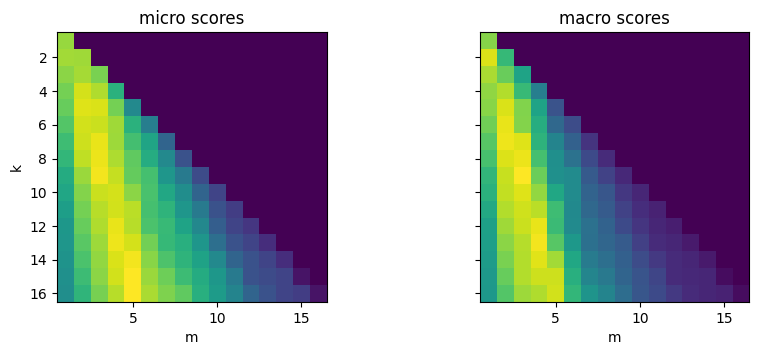

In [42]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
ax0.imshow(perf_micro)
ax1.imshow(perf_macro)

ax0.set_title("micro scores")
ax0.set_ylabel("k")
ax1.set_title("macro scores")
for ax in [ax0, ax1]:
    ax.set_xlim([0.5, 17 - 0.5])
    ax.set_ylim([17 - 0.5, 0.5])
    ax.set_xlabel("m")
plt.show()

In [56]:
k, m = np.unravel_index(perf_micro.argmax(), perf_micro.shape)
print(f"Best k: {k}, best m: {m} The perfomance is best when we choose and, or in other words when we retrieve the 15 nearest neighbors and then assign the labels that occurred at least 5 times.")

Best k: 15, best m: 5 The perfomance is best when we choose and, or in other words when we retrieve the 15 nearest neighbors and then assign the labels that occurred at least 5 times.


## Remove the fiass embedding so we can compare to NB

In [32]:
embs_train.drop_index("embedding")
test_labels = np.array(embs_test["label_ids"])
test_queries = np.array(embs_test["embedding"], dtype=np.float32)

for train_slice in train_slices:
    # Create a Faiss index from training slice
    embs_train_tmp = embs_train.select(train_slice)
    embs_train_tmp.add_faiss_index("embedding")
    # Get best k, m values with validation set
    perf_micro, _ = find_best_k_m(embs_train_tmp, valid_queries, valid_labels)
    k, m = np.unravel_index(perf_micro.argmax(), perf_micro.shape)
    # Get predictions on test set
    _, samples = embs_train_tmp.get_nearest_examples_batch("embedding",
                                                           test_queries,
                                                           k=int(k))
    y_pred = np.array([get_sample_preds(s, m) for s in samples])
    # Evaluate predictions
    clf_report = classification_report(test_labels, y_pred,
        target_names=mlb.classes_, zero_division=0, output_dict=True,)
    macro_scores["Embedding"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Embedding"].append(clf_report["micro avg"]["f1-score"])

NameError: name 'embs_train' is not defined

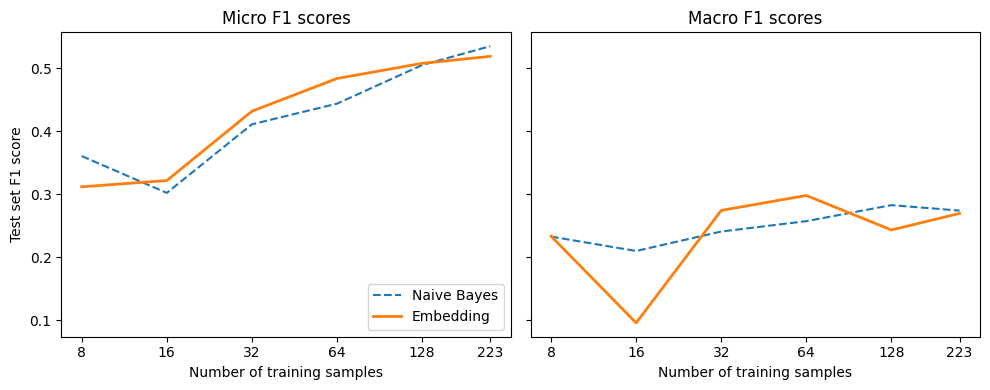

In [42]:
plot_metrics(micro_scores, macro_scores, train_samples, "Embedding")


# Fine-tune Vanilla Transformer

### Run the def label_id section from NB

In [38]:
import torch

In [36]:
from transformers import (AutoTokenizer, AutoConfig,
                          AutoModelForSequenceClassification)

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, max_length=128)
ds_enc = ds.map(tokenize, batched=True)
ds_enc = ds_enc.remove_columns(['labels', 'text'])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

First, we create a new column with the labels. The format of that column is inferred from the first element. Then we delete the original column and rename the new one to take the place of the original one:

In [39]:
ds_enc.set_format("torch")


In [40]:
ds_enc = ds_enc.map(lambda x: {"label_ids_f": x["label_ids"].to(torch.float)},
                    remove_columns=["label_ids"])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

In [41]:
ds_enc = ds_enc.rename_column("label_ids_f", "label_ids")

In [42]:
from transformers import Trainer, TrainingArguments

training_args_fine_tune = TrainingArguments(
    output_dir="./results", num_train_epochs=20, learning_rate=3e-5,
    lr_scheduler_type='constant', per_device_train_batch_size=4,
    per_device_eval_batch_size=32, weight_decay=0.0,
    evaluation_strategy="epoch", save_strategy="epoch",logging_strategy="epoch",
    load_best_model_at_end=True, metric_for_best_model='micro f1',
    save_total_limit=1, log_level='error')

2023-08-10 14:58:31.736418: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Get F1 score to choose the best model

In [43]:
from scipy.special import expit as sigmoid

def compute_metrics(pred):
    y_true = pred.label_ids
    y_pred = sigmoid(pred.predictions)
    y_pred = (y_pred>0.5).astype(float)

    clf_dict = classification_report(y_true, y_pred, target_names=all_labels,
                                     zero_division=0, output_dict=True)
    return {"micro f1": clf_dict["micro avg"]["f1-score"],
            "macro f1": clf_dict["macro avg"]["f1-score"]}


In [44]:
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"


In [49]:
for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model, tokenizer=tokenizer,
        args=training_args_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],)

    trainer.train()
    pred = trainer.predict(ds_enc["test"])
    metrics = compute_metrics(pred)
    macro_scores["Fine-tune (vanilla)"].append(metrics["macro f1"])
    micro_scores["Fine-tune (vanilla)"].append(metrics["micro f1"])

/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.655600,0.628217,0.090141,0.043549
2,0.599800,0.542901,0.000000,0.000000
3,0.514500,0.509387,0.016529,0.007937
4,0.486700,0.470546,0.000000,0.000000
5,0.440600,0.441134,0.000000,0.000000
6,0.430600,0.416881,0.000000,0.000000
7,0.388600,0.407660,0.000000,0.000000
8,0.375000,0.392427,0.000000,0.000000
9,0.357400,0.382456,0.000000,0.000000
10,0.339500,0.376292,0.000000,0.000000


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.610300,0.562859,0.053097,0.011905
2,0.528400,0.484721,0.000000,0.000000
3,0.460200,0.440448,0.000000,0.000000
4,0.406000,0.418575,0.000000,0.000000
5,0.381300,0.394047,0.000000,0.000000
6,0.364200,0.379400,0.000000,0.000000
7,0.336100,0.374560,0.000000,0.000000
8,0.316200,0.366025,0.000000,0.000000
9,0.299000,0.363929,0.000000,0.000000
10,0.283200,0.358781,0.000000,0.000000


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.581300,0.504005,0.000000,0.000000
2,0.450700,0.422433,0.000000,0.000000
3,0.388400,0.385133,0.000000,0.000000
4,0.344100,0.367702,0.000000,0.000000
5,0.324200,0.361221,0.000000,0.000000
6,0.307000,0.350159,0.000000,0.000000
7,0.286500,0.348104,0.120301,0.044444
8,0.269300,0.339325,0.016529,0.007937
9,0.248200,0.336468,0.032787,0.016825
10,0.226900,0.336227,0.186667,0.069959


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.536200,0.430440,0.000000,0.000000
2,0.394200,0.376079,0.000000,0.000000
3,0.356500,0.356974,0.000000,0.000000
4,0.333700,0.342764,0.000000,0.000000
5,0.307300,0.329580,0.016529,0.008889
6,0.277600,0.315343,0.222222,0.085470
7,0.258400,0.306866,0.244604,0.094384
8,0.232600,0.299380,0.434783,0.188406
9,0.204300,0.281515,0.478528,0.221615
10,0.177900,0.274485,0.456790,0.176688


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.460600,0.374657,0.000000,0.000000
2,0.353100,0.351391,0.000000,0.000000
3,0.320200,0.320637,0.222222,0.085470
4,0.288000,0.295841,0.402597,0.159877
5,0.250700,0.277390,0.479042,0.182088
6,0.213400,0.258007,0.445860,0.192112
7,0.177800,0.249637,0.465409,0.222019
8,0.150400,0.222388,0.592179,0.355295
9,0.120500,0.233102,0.557377,0.392183
10,0.098700,0.213924,0.634921,0.450387


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.424600,0.354335,0.000000,0.000000
2,0.326400,0.316710,0.246377,0.098659
3,0.283900,0.274095,0.452830,0.177778
4,0.236300,0.240482,0.549708,0.273021
5,0.197000,0.234704,0.514970,0.226645
6,0.165400,0.206455,0.587571,0.344443
7,0.133400,0.188961,0.670157,0.485860
8,0.104600,0.190430,0.673267,0.525041
9,0.080600,0.190039,0.695652,0.586860
10,0.064700,0.213735,0.670000,0.540206


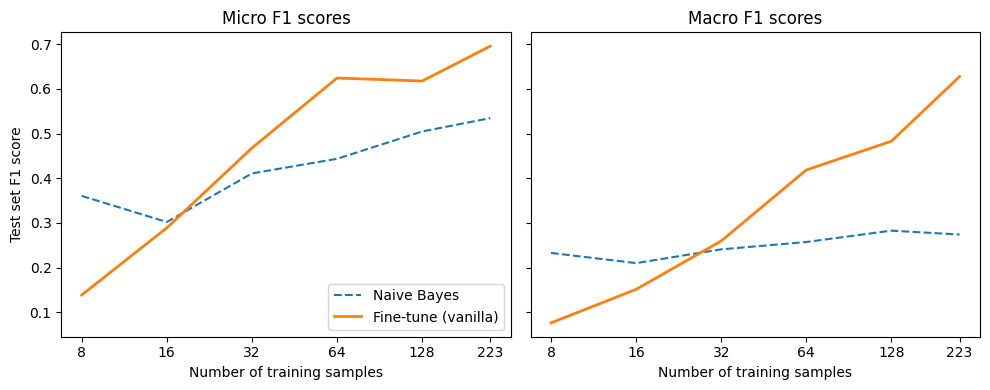

In [52]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (vanilla)")


# Domain adaptation

In this step we use the classic language model objective of predicting masked words, which means we don’t need any labeled data. After that we can load the adapted model as a classifier and fine-tune it, thus leveraging the unlabeled data.

## Start by fine-tuning a language model

we’ll fine-tune the pretrained BERT model with masked language modeling on the unlabeled portion of our dataset

## Re-tokenize text so it doesn't predict [CLS] or [SEP]

In [54]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True,
                     max_length=128, return_special_tokens_mask=True)

ds_mlm = ds.map(tokenize, batched=True)
ds_mlm = ds_mlm.remove_columns(["labels", "text", "label_ids"])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

### Use data-collator to prepare the elements in the bach to feed them to the model. We need to mask tokens in the input sequence and have the target tokens in the outputs

In [55]:
from transformers import DataCollatorForLanguageModeling, set_seed

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer,
                                                mlm_probability=0.15)

### Example of what data collator is doing:

In [57]:
data_collator.return_tensors = "pt"


## Need to login to huggingface first through terminal! Run `hugging-face cli login`

Use the write tokens from here: [https://huggingface.co/settings/tokens](https://huggingface.co/settings/tokens)

In [69]:
from transformers import AutoModelForMaskedLM

training_args = TrainingArguments(
    output_dir = f"{model_ckpt}-issues-128", per_device_train_batch_size=32,
    logging_strategy="epoch", evaluation_strategy="epoch", save_strategy="no",
    num_train_epochs=16, push_to_hub=True, log_level="error", report_to="none")

trainer = Trainer(
        model=AutoModelForMaskedLM.from_pretrained("bert-base-uncased"),
        tokenizer=tokenizer, args=training_args, data_collator=data_collator,
        train_dataset=ds_mlm["unsup"], eval_dataset=ds_mlm["train"])

trainer.train()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/opt/conda/lib/python3.8/site-packages/huggingface_hub/repository.py:705: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.11.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Cloning https://huggingface.co/veeps/bert-base-uncased-issues-128 into local empty directory.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'loss': 2.0957, 'learning_rate': 4.6875e-05, 'epoch': 1.0}
{'eval_loss': 1.7104768753051758, 'eval_runtime': 0.6862, 'eval_samples_per_second': 324.989, 'eval_steps_per_second': 40.806, 'epoch': 1.0}
{'loss': 1.638, 'learning_rate': 4.375e-05, 'epoch': 2.0}
{'eval_loss': 1.4308608770370483, 'eval_runtime': 0.6873, 'eval_samples_per_second': 324.446, 'eval_steps_per_second': 40.738, 'epoch': 2.0}
{'loss': 1.4808, 'learning_rate': 4.0625000000000005e-05, 'epoch': 3.0}
{'eval_loss': 1.3845466375350952, 'eval_runtime': 0.6899, 'eval_samples_per_second': 323.248, 'eval_steps_per_second': 40.587, 'epoch': 3.0}
{'loss': 1.3998, 'learning_rate': 3.7500000000000003e-05, 'epoch': 4.0}
{'eval_loss': 1.3727912902832031, 'eval_runtime': 0.6929, 'eval_samples_per_second': 321.813, 'eval_steps_per_second': 40.407, 'epoch': 4.0}
{'loss': 1.3409, 'learning_rate': 3.4375e-05, 'epoch': 5.0}
{'eval_loss': 1.1967356204986572, 'eval_runtime': 0.6894, 'eval_samples_per_second': 323.46, 'eval_steps_per_secon

TrainOutput(global_step=4656, training_loss=1.280756848784247, metrics={'train_runtime': 1406.3032, 'train_samples_per_second': 105.843, 'train_steps_per_second': 3.311, 'train_loss': 1.280756848784247, 'epoch': 16.0})

In [70]:
import pickle

In [71]:
train_file = open("trainer", "ab")


In [73]:
pickle.dump(trainer, train_file)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_320/2379211482.py:1 in <module>                                                   │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_320/2379211482.py'                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: Can't pickle local object 'get_linear_schedule_with_warmup.<locals>.lr_lambda'

In [74]:
trainer.push_to_hub("Training complete!")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Upload file pytorch_model.bin:   0%|          | 1.00/418M [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.23k [00:00<?, ?B/s]

To https://huggingface.co/veeps/bert-base-uncased-issues-128
   ad93a05..56a4f0b  main -> main



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

To https://huggingface.co/veeps/bert-base-uncased-issues-128
   56a4f0b..2ff3b3e  main -> main



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'https://huggingface.co/veeps/bert-base-uncased-issues-128/commit/56a4f0b9d998a2a5ad5d4816ffb0a0bb69f78dfb'

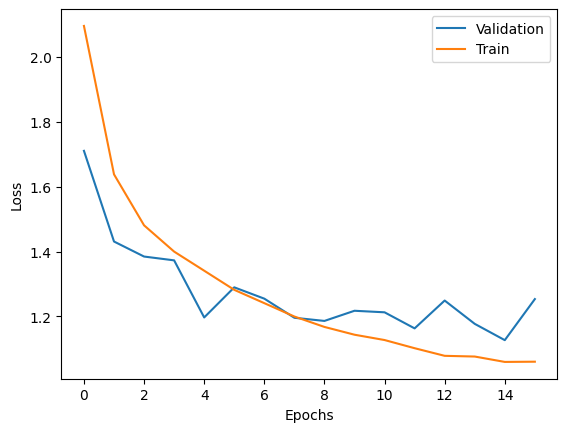

In [75]:
df_log = pd.DataFrame(trainer.state.log_history)

(df_log.dropna(subset=["eval_loss"]).reset_index()["eval_loss"]
 .plot(label="Validation"))
df_log.dropna(subset=["loss"]).reset_index()["loss"].plot(label="Train")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

## Fine-Tuning Classifier

In [76]:
model_ckpt = f'{model_ckpt}-issues-128'
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"

for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model,
        tokenizer=tokenizer,
        args=training_args_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],
    )

    trainer.train()
    pred = trainer.predict(ds_enc['test'])
    metrics = compute_metrics(pred)
    # DA refers to domain adaptation
    macro_scores['Fine-tune (DA)'].append(metrics['macro f1'])
    micro_scores['Fine-tune (DA)'].append(metrics['micro f1'])

/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.639500,0.550975,0.016260,0.013072
2,0.501200,0.473030,0.000000,0.000000
3,0.418700,0.428419,0.000000,0.000000
4,0.387100,0.400519,0.000000,0.000000
5,0.349400,0.385179,0.000000,0.000000
6,0.331900,0.376035,0.000000,0.000000
7,0.308100,0.371176,0.000000,0.000000
8,0.292000,0.366949,0.000000,0.000000
9,0.271300,0.362813,0.000000,0.000000
10,0.267600,0.358822,0.000000,0.000000


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.624500,0.519143,0.000000,0.000000
2,0.449500,0.427690,0.000000,0.000000
3,0.380700,0.387758,0.000000,0.000000
4,0.339600,0.370710,0.000000,0.000000
5,0.312200,0.360936,0.000000,0.000000
6,0.290600,0.353674,0.000000,0.000000
7,0.263900,0.349333,0.000000,0.000000
8,0.245900,0.343888,0.000000,0.000000
9,0.226100,0.337995,0.000000,0.000000
10,0.209500,0.335164,0.109375,0.048611


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.562300,0.441979,0.000000,0.000000
2,0.384700,0.376682,0.000000,0.000000
3,0.333700,0.358582,0.000000,0.000000
4,0.299300,0.346833,0.000000,0.000000
5,0.274100,0.337672,0.048780,0.024691
6,0.239500,0.327713,0.192593,0.079735
7,0.216100,0.323104,0.207407,0.087398
8,0.190200,0.318376,0.217391,0.088889
9,0.169100,0.314163,0.289655,0.134183
10,0.151700,0.318715,0.253521,0.108271


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.495600,0.381274,0.000000,0.000000
2,0.355600,0.352248,0.000000,0.000000
3,0.322700,0.330987,0.032787,0.017094
4,0.287300,0.314013,0.281690,0.113330
5,0.247600,0.299782,0.425000,0.165862
6,0.210000,0.285817,0.445783,0.170219
7,0.177300,0.278484,0.432099,0.185185
8,0.148400,0.267892,0.472727,0.234231
9,0.124900,0.264986,0.500000,0.255593
10,0.107900,0.266477,0.465116,0.230807


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.427100,0.351762,0.000000,0.000000
2,0.326100,0.312834,0.283688,0.098765
3,0.278500,0.276417,0.455696,0.178656
4,0.224200,0.241461,0.530120,0.254570
5,0.170800,0.233399,0.554913,0.306638
6,0.135800,0.209964,0.641304,0.455856
7,0.105400,0.202956,0.631016,0.471503
8,0.083300,0.204178,0.619565,0.446416
9,0.068900,0.183694,0.677249,0.523145
10,0.058400,0.193452,0.673797,0.504055


/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Micro f1,Macro f1
1,0.396700,0.328636,0.248175,0.092141
2,0.300400,0.281270,0.342466,0.133488
3,0.239100,0.224034,0.613636,0.368917
4,0.173100,0.199810,0.652174,0.473001
5,0.123700,0.190369,0.680628,0.576246
6,0.087300,0.168397,0.730000,0.637330
7,0.066300,0.172276,0.719212,0.661344
8,0.053100,0.173485,0.737374,0.665661
9,0.043500,0.177901,0.742574,0.679741
10,0.035200,0.173541,0.740000,0.679150


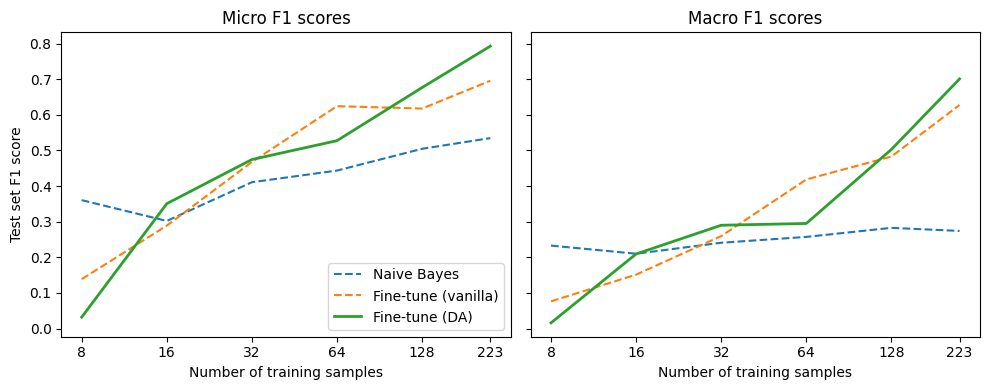

In [77]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (DA)")
